In [126]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains
import requests, re, json ,pprint
from bs4 import BeautifulSoup
import pandas as pd
import urllib
import urllib.request
from selenium.webdriver.common.keys import Keys
from IPython.display import Image
from urllib.parse import urlparse
from time import sleep
import datetime
import pytz # new import
new_timezone = pytz.timezone("US/Eastern")
import spacy
import en_core_web_sm
import en_core_web_lg
import en_vectors_web_lg
import en_core_web_md

from dateparser.search import search_dates
import arrow
import datetime

In [127]:
driver_path='./chromedriver'
options = webdriver.ChromeOptions()
options.add_argument('headless')   
driver = webdriver.Chrome(driver_path,options=options)
# driver = webdriver.Chrome('./chromedriver')
driver.implicitly_wait(10)

In [ ]:
# my_url = 'https://www.youtube.com/watch?v=A1tqTQkC36A'
my_url = 'https://www.youtube.com/watch?v=A1tqTQkC36A&amp;lc=Ugw0nq07e-G5JyUsl094AaABAg'
driver.get(my_url)
sleep(1)
# wa
# driver.close()

In [169]:
def reload_test_site():
    my_url = 'https://www.youtube.com/watch?v=A1tqTQkC36A&amp;lc=Ugw0nq07e-G5JyUsl094AaABAg'
    driver.get(my_url)
    sleep(1)

## Define User ID

In [ ]:
nlp = en_core_web_sm.load()
# nlp = en_core_web_md.load()
# nlp2 = en_core_web_lg.load()
# python -m spacy download en_core_web_lg

In [75]:
def extract_person(input_text):
    doc = nlp(input_text)
    spans = list(doc.ents) 
    for ent in doc.ents:
        if (ent.label_=='PERSON'):
            return ent.text
        
def extract_date_published(driver):
    test = driver.find_element_by_class_name(name='date')
    test.text
    doc = nlp(test.text)
    spans = list(doc.ents) 
    for ent in doc.ents:
        if (ent.label_=='DATE'):
            return ent.text  

In [179]:
def extract_transcript(driver):
    driver.save_screenshot('page-before.png')
    test = driver.find_element_by_xpath("//button[@aria-label='More actions']");
    test.click()
    driver.implicitly_wait(2)
    menu = driver.find_element_by_id(id_='contentWrapper')
    driver.implicitly_wait(2)
    test_open = menu.find_element_by_xpath('//ytd-menu-service-item-renderer[@role="menuitem"]/yt-formatted-string[text()="Open transcript"]')
    test_open.click()
    sleep(5)
    test_body = driver.find_element_by_id('body').text.encode('utf-8')
    driver.save_screenshot('page-after.png')
    return str(test_body)

In [167]:
driver.save_screenshot('page-before.png')
test = driver.find_element_by_xpath("//button[@aria-label='More actions']");
test.click()
driver.implicitly_wait(2)
menu = driver.find_element_by_id(id_='contentWrapper')
driver.implicitly_wait(2)
test_open = menu.find_element_by_xpath('//ytd-menu-service-item-renderer[@role="menuitem"]/yt-formatted-string[text()="Open transcript"]')
test_open.click()
sleep(5)
test_body = driver.find_element_by_id('body').text.encode('utf-8')
driver.save_screenshot('page-after.png')

True

In [165]:
driver.save_screenshot('page-after.png')

True

In [178]:
type(str(test_body))

str

In [147]:
test_body.text.encode('utf-8')

b"00:00\none day more until the 2018 midterms\n00:03\nboth parties make their closing\n00:04\narguments we take a look at the latest\n00:06\noutbreak of anti-semitism in New York\n00:08\nCity and Gloria Steinem and Barbara\n00:10\nStreisand\n00:11\nare back and better than ever I'm Ben\n00:13\nShapiro this is the Ben Shapiro show\n00:18\noh so many things to talk about because\n00:22\nwe have one day more until the midterm\n00:25\nelections and tomorrow we are doing some\n00:26\npretty awesome stuff you're gonna want\n00:27\nto tune in not only do I have my normal\n00:29\nepisode we also are doing our election\n00:31\nnight special which we do for your\n00:32\npleasure not mine so be there I mean if\n00:34\nI'm gonna put that sort of sacrifice and\n00:36\nyou may as well be there because come on\n00:37\npeople come on if I'm gonna sacrifice my\n00:39\nnight you need to suffer with me but\n00:41\nfirst let's talk a little bit about what\n00:44\nyou do for your legal services so as a\n00

In [138]:
driver.get_screenshot_as_file('main-page.png')


True

In [ ]:
test.text

In [71]:
datetime(pub_date)

TypeError: 'module' object is not callable

In [72]:
from dateutil.parser import parse
# dateformat = '%B %d, %Y %I:%M %p %Z'
# temp_date = 'Sage Group plc ( OTC:SGGEF ) Q4 2014 Earnings Conference Call December 3, 2014 3:45 AM ET'

date_out = dateparser.parse(date_string=pub_date)


NameError: name 'dateparser' is not defined

In [ ]:
series = video_title.split('|')[1]
doc = nlp(series)
spans = list(doc.ents) 
# series = str(doc.ents[0])
for ent in doc.ents:
    if (ent.label_=='PERSON'):
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
# print(series)
# print(spans)

In [180]:
reload_test_site()
# {'userid':'internetoftim', 
#         'posts':self.post_count
#         'followers': self.followers, 
#         'following': self.following,
#         'profile_pic_uri':self.profile_pic_uri
#          }
o =urlparse(my_url)
video_id = urllib.parse.parse_qs(o.query)['v'][0]
video_title = driver.find_element_by_class_name(name='title').text
# Get series title==============================
series = video_title.split('|')[1]
doc = nlp(series)
spans = list(doc.ents) 
series = str(doc.ents[0])
series = re.sub(string=series,pattern='ep\.?$',repl='',flags=re.IGNORECASE)
series = re.sub(string=series,pattern='episode?$',repl='',flags=re.IGNORECASE)
series = re.sub(string=series,pattern='\s+$',repl='',flags=re.IGNORECASE)
video = 1
comment = 0
reply = 0
#===============================================
owner = driver.find_element_by_id('owner-container')
for a in owner.find_elements_by_tag_name('a'):
    channel = a.text
description = driver.find_element_by_id('description').text

video_op = extract_person(video_title)
# ====== Get Date Published=======
date_posted = extract_date_published(driver)
#===============================================
comment_op = 'N/A'
reply_op = 'N/A'
content = 'TO DO'

# ====== Get content transcript=======
transcript = extract_transcript(driver)
#===============================================
# video_id	
# video_url	video_title	
# channel	
# series	video_snippet	
# video	comment	reply	video_op	
# comment_op	reply_op	date_posted	content	
date_scrape = datetime.datetime.now(new_timezone).strftime("%Y_%m_%d_%H_%M_%S")
x =  { "video_id": video_id, "video_url":my_url,\
      "video_title":video_title, "channel":channel,\
     "series":series, "video_snippet":description,\
     "video":video,"comment":comment,"reply":reply,\
     "video_op":video_op, "comment_op":comment_op,\
     "reply_op":reply_op,"date_posted":date_posted,\
     "content":transcript,"date_scrape":date_scrape}
# parse x:
y = json.dumps(x)
y_json = json.loads(y)

In [181]:
y_json

{'video_id': 'A1tqTQkC36A',
 'video_url': 'https://www.youtube.com/watch?v=A1tqTQkC36A&amp;lc=Ugw0nq07e-G5JyUsl094AaABAg',
 'video_title': 'One Day More | The Ben Shapiro Show Ep. 653',
 'channel': 'The Daily Wire',
 'series': 'The Ben Shapiro Show',
 'video_snippet': 'One day until the 2018 midterms, both parties make their closing arguments; we take a look at the latest outbreak of anti-Semitism; and Gloria Steinem and Barbra Streisand are back.\n\nTo watch the full show live, become a premium subscriber. Join the team! \nLike this video? For more Ben Shapiro and Daily Wire content, subscribe to this channel and the Ben Shapiro YouTube channel youtube.com/c/benshapiro and ring the bell for notifications so you never miss a story!',
 'video': 1,
 'comment': 0,
 '0': 'TO DO',
 'video_op': 'The Ben Shapiro Show Ep.',
 'comment_op': 'N/A',
 'reply_op': 'N/A',
 'date_posted': 'Nov 5, 2018',
 'content': 'b"00:00\\none day more until the 2018 midterms\\n00:03\\nboth parties make their closi

In [172]:

transcript
# old_timezone = pytz.timezone("US/Eastern")

# print (datetime.datetime.now(new_timezone).strftime("%Y_%m_%d_%H_%M_%S"))
# 2

b"00:00\none day more until the 2018 midterms\n00:03\nboth parties make their closing\n00:04\narguments we take a look at the latest\n00:06\noutbreak of anti-semitism in New York\n00:08\nCity and Gloria Steinem and Barbara\n00:10\nStreisand\n00:11\nare back and better than ever I'm Ben\n00:13\nShapiro this is the Ben Shapiro show\n00:18\noh so many things to talk about because\n00:22\nwe have one day more until the midterm\n00:25\nelections and tomorrow we are doing some\n00:26\npretty awesome stuff you're gonna want\n00:27\nto tune in not only do I have my normal\n00:29\nepisode we also are doing our election\n00:31\nnight special which we do for your\n00:32\npleasure not mine so be there I mean if\n00:34\nI'm gonna put that sort of sacrifice and\n00:36\nyou may as well be there because come on\n00:37\npeople come on if I'm gonna sacrifice my\n00:39\nnight you need to suffer with me but\n00:41\nfirst let's talk a little bit about what\n00:44\nyou do for your legal services so as a\n00

In [6]:
alt_profile_pic=userid+"'s profile picture"

In [7]:
def load_profile_page(userid,driver_path='./chromedriver'):
    options = webdriver.ChromeOptions()
    options.add_argument('headless')   
    main_driver = webdriver.Chrome(driver_path,options=options)
    main_driver.implicitly_wait(10)
    main_driver.get("https://www.instagram.com/"+userid)
    return main_driver


In [8]:
def extract_profile_pic_uri (main_driver):
    pic_url = main_driver.find_element_by_class_name(name='_6q-tv')
    return pic_url.get_attribute(name='src')
    
    

In [9]:
def extract_followers(main_driver):
    follower_element = main_driver.find_element_by_partial_link_text(link_text="followers")
    return follower_element.find_element_by_class_name(name='g47SY').text

In [10]:
def extract_post_count(main_driver):
    follower_element = main_driver.find_element_by_partial_link_text(link_text="posts")
    return follower_element.find_element_by_class_name(name='g47SY').text

In [11]:
def extract_following(main_driver):
    follower_element = main_driver.find_element_by_partial_link_text(link_text="following")
    return follower_element.find_element_by_class_name(name='g47SY').text

In [12]:
def download_profile_pic(userid,output_path='./'):
    main_driver = load_profile_page(userid=userid)
    profile_pic_uri = extract_profile_pic_uri(main_driver)
    urllib.request.urlretrieve(profile_pic_uri,output_path+userid+'.jpg')

In [13]:
# download_profile_pic(userid='internetoftim')
# download_profile_pic(userid='wunderingbark')

In [14]:
main_driver = load_profile_page(userid='internetoftim')

In [15]:
body_placeholder = main_driver.find_element_by_tag_name('main')

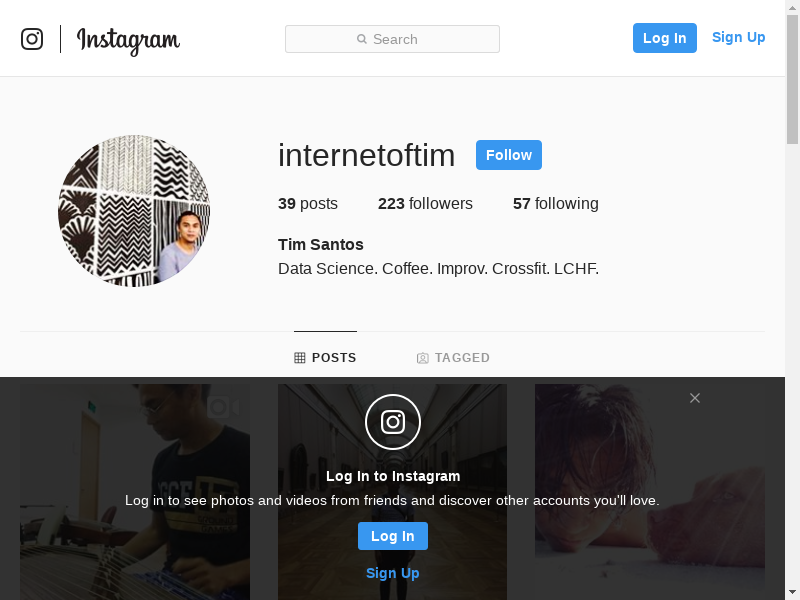

In [16]:
main_driver.get_screenshot_as_file('main-page.png')
Image(filename='main-page.png') 
# body_placeholder.send_keys(Keys.END)
# # body_placeholder.text

# # driver.switch_to.frame(driver.find_element_by_css_selector('iframe[class="credit-card-iframe mt1 u-full-width"]'))
# # driver.find_element_by_id('creditCardNumber').send_keys('0000')
# # temp_out = main_driver.switch_to.frame(main_driver.find_element_by_tag_name('main'))
# # 

# body = main_driver.find_element_by_css_selector('body')


In [130]:
class InstaUser:
    def __init__(self,userid):
        self.main_driver = None
        self.userid = userid
        self.profile_pic_uri = None
        self.followers = None
        self.following = None
        self.post_count = None
        self.profile_thumbnail = None
        self.screenshot = None
        self.fileout = None
        self.axn = None
    def init_driver(self):
        self.main_driver = load_profile_page(userid=self.userid)
        self.axn = ActionChains(self.main_driver)
    # Profile Page Info
    def extract_follower(self):
        self.followers = extract_followers(self.main_driver)
    def extract_following(self):
        self.following = extract_following(self.main_driver)
    def extract_post_count(self):
        self.post_count = extract_post_count(self.main_driver)        
    def extract_profile_infos(self):
        self.extract_follower()
        self.extract_following()
        self.extract_post_count()
        self.extract_profile_pic_uri()
    
    #   Pics  
    def extract_profile_pic_uri(self):
        self.profile_pic_uri = extract_profile_pic_uri(self.main_driver)
    #  def extract_first_pic_uri(self):
    #  extract first pic
                
    # Do something
    
    def scroll_down_page(self):
        self.axn.send_keys(Keys.END).perform()    
        
    # Outputs        
    def screenshot_main(self,fileout='main-page.png'):
        self.main_driver.get_screenshot_as_file(fileout)
        self.fileout=fileout
        
    def to_csv(self, csvfile):
        print(csvfile)
        
    def to_db(self, db_host, db_password, db_table):
        print('write to db')

        self.userid = userid
        self.profile_pic_uri = None
        self.followers = None
        self.following = None
        self.post_count = None
        self.profile_thumbnail = None
        self.screenshot = None
        self.fileout = None
    def get_info():
        result = {'userid':'internetoftim', 
        'posts':self.post_count
        'followers': self.followers, 
        'following': self.following,
        'profile_pic_uri':self.profile_pic_uri
         }
        return result

In [131]:
tim_user = InstaUser(userid='internetoftim')

In [132]:
tim_user.init_driver()

In [133]:
tim_user.extract_profile_infos()

In [134]:
tim_user.profile_pic_uri

'https://scontent-hkg3-1.cdninstagram.com/vp/1783592e02bd4ab825db6631e8054837/5C3F78AB/t51.2885-19/s150x150/17333968_1876464679298542_9042449064951545856_a.jpg'

In [135]:
tim_user.screenshot_main()

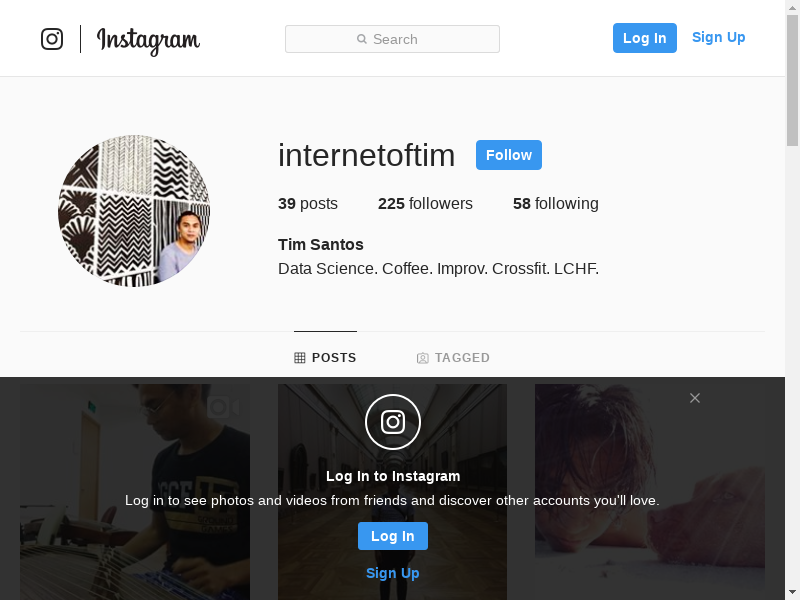

In [136]:
Image(filename=tim_user.fileout) 

In [128]:
# ActionChains(main_driver).send_key

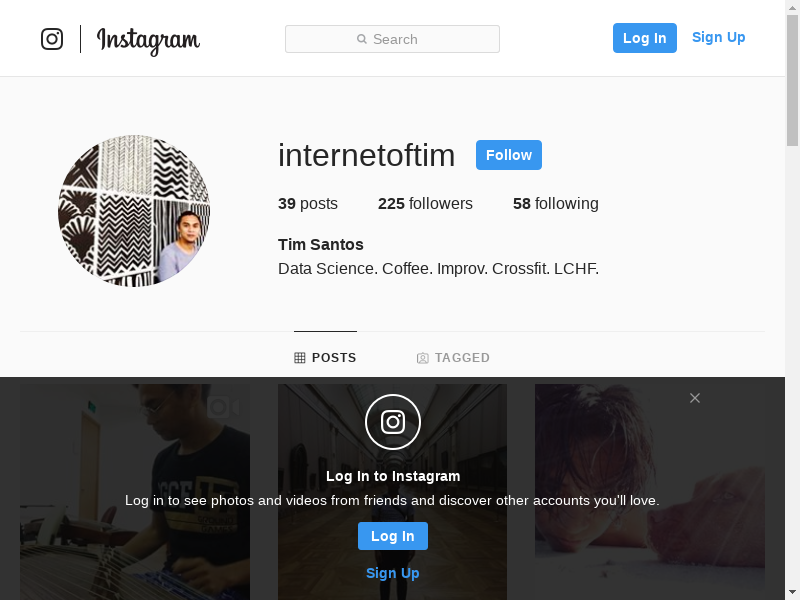

In [129]:
# main_driver.get_screenshot_as_file('main-page.png')
# Image(filename='main-page.png') 

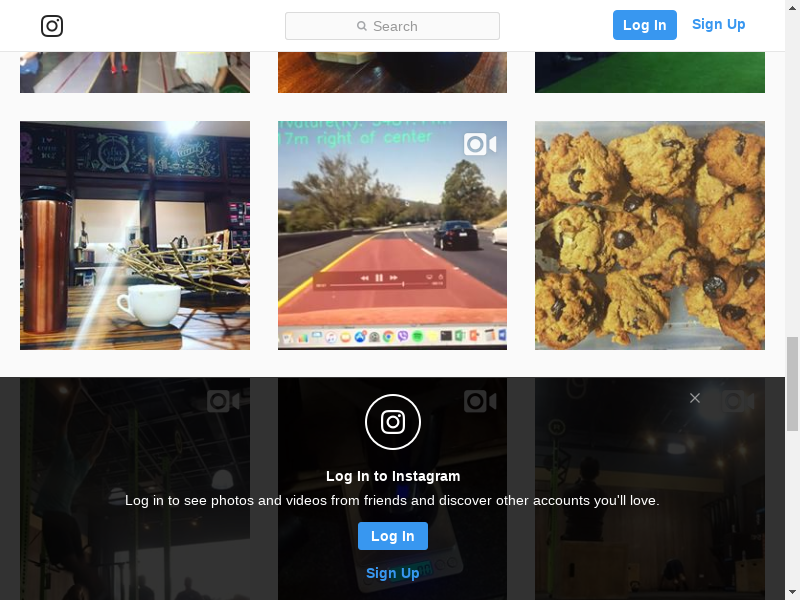

In [139]:
tim_user.scroll_down_page()
tim_user.screenshot_main()
Image(filename=tim_user.fileout)

In [6]:
import mirrorr_instagram_extractor
from mirrorr_instagram_extractor import InstaUser

In [7]:
tim_user = InstaUser(userid='internetoftim')

In [11]:
tim_user.init_driver()

In [13]:
tim_user.extract_profile_infos()

In [14]:
tim_user.followers

'226'

In [176]:
type(test_open.text())

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=69.0.3497.100)
  (Driver info: chromedriver=2.42.591071 (0b695ff80972cc1a65a5cd643186d2ae582cd4ac),platform=Linux 4.9.0-8-amd64 x86_64)
